In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pylab import rcParams

import sklearn
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\meena\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
price = pd.read_csv('C:/Users/meena/Documents/Python_Scripts/Assign2.csv')
price.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0


In [3]:
price.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [4]:
price_data = price.drop(['id','date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','sqft_above','sqft_basement'], 1)
price_data.head()

,price,condition,grade,yr_built,yr_renovated
0,221900.0,3,7,1955,0
1,538000.0,3,7,1951,1991
2,180000.0,3,6,1933,0
3,604000.0,5,7,1965,0
4,510000.0,3,8,1987,0


In [5]:
X = price_data.values[:, (0,2,3,4)]
Y = price_data.values[:,1]

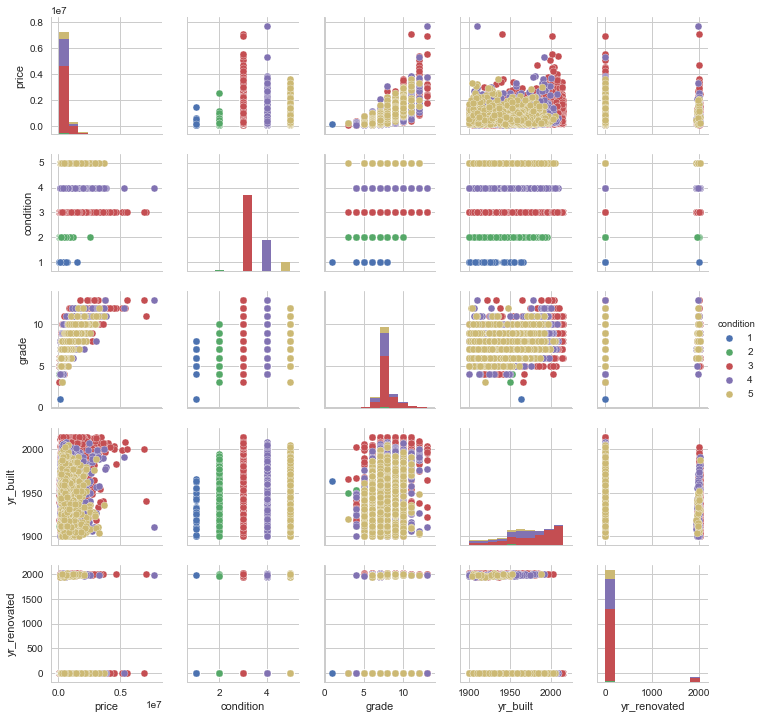

In [6]:
sns.pairplot(price_data,hue='condition',size=2)

In [7]:
X_scale = preprocessing.scale(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = .3, random_state = 100)

# K -Nearest Neighbor

Supervised machine learning method used to classify instances based on the arithmetic difference between features in a labeled data set. 

In [9]:
neigh = neighbors.KNeighborsClassifier()
neigh.fit(X_train, y_train)
print(neigh)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')


In [10]:
y_pred = neigh.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        1.0       0.00      0.00      0.00        11
        2.0       0.20      0.02      0.03        53
        3.0       0.70      0.83      0.76      4227
        4.0       0.36      0.29      0.32      1696
        5.0       0.24      0.04      0.07       497

avg / total       0.57      0.62      0.58      6484



In [11]:
print(metrics.accuracy_score(y_test,y_pred))

0.621375694016
